# Sentiment Analysis
- First attempt to add raw IPO filings data
- The art of Feature Enginnering
- Add Sentimnet Analysis features
 - Tokenize sentences
 - Use positive and negative sentences at 95th percentile means

In [17]:
#core
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

import glob
import nasdaq
import ml
from bs4 import BeautifulSoup
from pathlib import Path

#NLP
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load Baseline

In [18]:
#load and sort by date priced
df = pd.read_csv('../Datasets/1 baseline.csv', index_col='Symbol')
df = df[list(df.columns.drop(['1D', '1W', '1M', '3M'])) + ['1D', '1W', '1M', '3M']]

In [19]:
df.head()

,Q1,Q2,Q3,Q4,M1,M2,M3,M4,M5,M6,...,MKT13,Name Words,Name Length,Offer Amount,Price,Shares,1D,1W,1M,3M
Symbol,,,,,,,,,,,,,,,,,,,,,
WQNI,1,0,0,0,0,1,0,0,0,0,...,0,2,9,35750000.0,13.0,2750000,-0.129856,-0.296122,0.088818,-0.667432
BBGI,1,0,0,0,0,1,0,0,0,0,...,0,4,27,106175000.0,15.5,6850000,-0.058333,-0.133333,-0.175000,-0.250000
UTSI,1,0,0,0,0,0,1,0,0,0,...,0,3,24,180000000.0,18.0,10000000,0.512195,0.448171,1.042683,-0.134146
SLAB,1,0,0,0,0,0,1,0,0,0,...,0,3,24,99200000.0,31.0,3200000,0.033730,0.349206,0.190476,-0.142857
ALTH,1,0,0,0,0,0,1,0,0,0,...,0,3,22,90000000.0,18.0,5000000,-0.116667,-0.054000,-0.391333,-0.300000


# Integrating IPO Raw Data

In [20]:
def get_sentiment_df(text):
    '''returns Sentiment Analysis'''
    sid = SentimentIntensityAnalyzer()
    ps_list = []
    sentences = sent_tokenize(text)
    
    for sentence in sentences:
        ps = sid.polarity_scores(sentence)
        ps['sent'] = sentence
        ps_list.append(ps)
    
    df = pd.DataFrame(ps_list)

    return df

In [21]:
def add_sentiment_features(df_sentiment, symbol):
    '''Adds Sentiment Snalysis features, returns DataFrame'''
    
    #filter frames
    df_tmp = pd.DataFrame()
    pos = df_sentiment[df_sentiment['pos'] > df_sentiment['pos'].quantile(0.95)]
    neg = df_sentiment[df_sentiment['neg'] > df_sentiment['neg'].quantile(0.95)]

    #sentences features
    df_tmp.at[symbol, 'Mean Sent Len'] = df_sentiment['sent'].str.len().mean()
    df_tmp.at[symbol, 'Sent Count'] = df_sentiment.shape[0]

    #pos sentiment
    df_tmp.at[symbol, 'Pos Mean Sent Len'] = pos['sent'].str.len().mean()
    df_tmp.at[symbol, 'Pos Sent Count'] = pos.shape[0]
    pos = pos[['compound', 'neg', 'neu', 'pos']]
    df_tmp = pd.concat([pd.DataFrame(pos.mean(), columns=[symbol]).T.add_prefix('Pos Sent Signal '), df_tmp], axis=1)

    #pos sentiment
    df_tmp.at[symbol, 'Neg Mean Sent Len'] = neg['sent'].str.len().mean()
    df_tmp.at[symbol, 'Neg Sent Count'] = neg.shape[0]
    neg = neg[['compound', 'neg', 'neu', 'pos']]
    df_tmp = pd.concat([pd.DataFrame(neg.mean(), columns=[symbol]).T.add_prefix('Neg Sent Signal '), df_tmp], axis=1)
    
    return df_tmp

In [22]:
#add sentiment features
df_sentiment_features = pd.DataFrame()
counter = 0    

for x in df.index:
    try:
        counter += 1
        print('\n( ' + str(counter) + ' / ' + str(df.shape[0]) + ' ) ' + x)

        #check if raw data is available
        file_name = "../Data/" + x + ".htm"
        if Path(file_name).is_file():
            #load raw IPO filing
            with open(file_name, "r", encoding="utf-8") as file:
                html = file.read()
                soup = BeautifulSoup(html,"html5lib")
                text = soup.get_text(strip=True)

                #get sentiment
                df_sentiment = get_sentiment_df(text)
                df_sentiment_features = pd.concat([df_sentiment_features, add_sentiment_features(df_sentiment, x)], axis=0)
        else:
            print('no S-1 for ', x)
    except Exception as e:
        print(x, e)
        
#combine original data with sentiment features
df1 = pd.concat([df_sentiment_features, df], axis=1)     


( 1 / 996 ) WQNI
no S-1 for  WQNI

( 2 / 996 ) BBGI

( 3 / 996 ) UTSI
no S-1 for  UTSI

( 4 / 996 ) SLAB
no S-1 for  SLAB

( 5 / 996 ) ALTH
no S-1 for  ALTH

( 6 / 996 ) WBSN
no S-1 for  WBSN

( 7 / 996 ) MET
no S-1 for  MET

( 8 / 996 ) LPSN
no S-1 for  LPSN

( 9 / 996 ) HSTM
no S-1 for  HSTM

( 10 / 996 ) PXLW
no S-1 for  PXLW

( 11 / 996 ) CYH
no S-1 for  CYH

( 12 / 996 ) QBAK
no S-1 for  QBAK

( 13 / 996 ) CRL
no S-1 for  CRL

( 14 / 996 ) ACLS
no S-1 for  ACLS

( 15 / 996 ) SOHU
no S-1 for  SOHU

( 16 / 996 ) SRTI
no S-1 for  SRTI

( 17 / 996 ) PTIE
no S-1 for  PTIE

( 18 / 996 ) SPRT
no S-1 for  SPRT

( 19 / 996 ) SMTX

( 20 / 996 ) ARNA
no S-1 for  ARNA

( 21 / 996 ) CAMT
no S-1 for  CAMT

( 22 / 996 ) ILMN
no S-1 for  ILMN

( 23 / 996 ) EVC

( 24 / 996 ) ERMS
no S-1 for  ERMS

( 25 / 996 ) DGEN
no S-1 for  DGEN

( 26 / 996 ) LTRX
no S-1 for  LTRX

( 27 / 996 ) MDCO
no S-1 for  MDCO

( 28 / 996 ) EQIX
no S-1 for  EQIX

( 29 / 996 ) DRRX
no S-1 for  DRRX

( 30 / 996 ) MON

( 31


( 334 / 996 ) WSR
no S-1 for  WSR

( 335 / 996 ) COR

( 336 / 996 ) CCIH
no S-1 for  CCIH

( 337 / 996 ) DQ
no S-1 for  DQ

( 338 / 996 ) STND

( 339 / 996 ) TOWR

( 340 / 996 ) BBRG

( 341 / 996 ) VRA

( 342 / 996 ) GLTR

( 343 / 996 ) PACB

( 344 / 996 ) PSLV
no S-1 for  PSLV

( 345 / 996 ) SODA
no S-1 for  SODA

( 346 / 996 ) CMRE
no S-1 for  CMRE

( 347 / 996 ) PRMW

( 348 / 996 ) NOAH
no S-1 for  NOAH

( 349 / 996 ) GM

( 350 / 996 ) LPLA

( 351 / 996 ) WITE

( 352 / 996 ) TRGP

( 353 / 996 ) RNET

( 354 / 996 ) WD

( 355 / 996 ) GCAP

( 356 / 996 ) OSN
no S-1 for  OSN

( 357 / 996 ) AAT

( 358 / 996 ) BCDS
no S-1 for  BCDS

( 359 / 996 ) INXN
no S-1 for  INXN

( 360 / 996 ) BKU

( 361 / 996 ) NAGS

( 362 / 996 ) NPTN
no S-1 for  NPTN

( 363 / 996 ) PCRX

( 364 / 996 ) BGMD

( 365 / 996 ) ECYT

( 366 / 996 ) GEVO

( 367 / 996 ) INN

( 368 / 996 ) ACRX

( 369 / 996 ) CRUD

( 370 / 996 ) HCA
no S-1 for  HCA

( 371 / 996 ) MX

( 372 / 996 ) CSOD

( 373 / 996 ) SREV

( 374 / 996 ) AP


( 686 / 996 ) LMRK

( 687 / 996 ) SKIS

( 688 / 996 ) HSGX

( 689 / 996 ) LC
no S-1 for  LC

( 690 / 996 ) WK

( 691 / 996 ) NEWR

( 692 / 996 ) ONDK

( 693 / 996 ) BLCM

( 694 / 996 ) ZSAN

( 695 / 996 ) ASND
no S-1 for  ASND

( 696 / 996 ) AVGR

( 697 / 996 ) ONCE

( 698 / 996 ) TCON

( 699 / 996 ) SHAK

( 700 / 996 ) DEA

( 701 / 996 ) INOV

( 702 / 996 ) AJX

( 703 / 996 ) BLPH

( 704 / 996 ) TONS

( 705 / 996 ) SMMT
no S-1 for  SMMT

( 706 / 996 ) NCOM
no S-1 for  NCOM

( 707 / 996 ) STDY

( 708 / 996 ) TANH
no S-1 for  TANH

( 709 / 996 ) JCAP

( 710 / 996 ) KRNT
no S-1 for  KRNT

( 711 / 996 ) ADRO

( 712 / 996 ) VIRT

( 713 / 996 ) EVA

( 714 / 996 ) BPMC

( 715 / 996 ) OPGN

( 716 / 996 ) ADAP
no S-1 for  ADAP

( 717 / 996 ) HTGM

( 718 / 996 ) COLL

( 719 / 996 ) TEGP

( 720 / 996 ) BOJA

( 721 / 996 ) RKDA

( 722 / 996 ) WING

( 723 / 996 ) CYAD
no S-1 for  CYAD

( 724 / 996 ) MCRN

( 725 / 996 ) GNRT

( 726 / 996 ) GKOS

( 727 / 996 ) CATB

( 728 / 996 ) LNTH

( 729 / 996 

In [23]:
#save for later improvements
df1.to_csv('../Datasets/2 sentiment analysis.csv', index=True, index_label='Symbol')

df1 = pd.read_csv('../Datasets/2 sentiment analysis.csv', index_col='Symbol')

In [24]:
#quarter and month
months = df1.loc[:, 'Q1':'MKT12'].columns
classes = df1.loc[:, '1D':'3M'].columns
others = df1.columns.difference(months).difference(classes)

#standardize
df1 = pd.concat([ml.standardize(df1[others]), df1[months], df1[classes]], axis=1)

In [25]:
df1.head()

,MKT13,Mean Sent Len,Name Length,Name Words,Neg Mean Sent Len,Neg Sent Count,Neg Sent Signal compound,Neg Sent Signal neg,Neg Sent Signal neu,Neg Sent Signal pos,...,MKT7,MKT8,MKT9,MKT10,MKT11,MKT12,1D,1W,1M,3M
AACC,-0.077811,-0.242287,0.959886,0.950039,-1.323104,-0.889050,0.755362,0.208046,-0.205996,-0.104725,...,0,0,0,0,0,0,0.002401,0.026411,0.073229,0.121248
AAT,-0.077811,0.471696,0.703022,0.950039,0.724422,1.960970,0.404416,-0.586229,0.408174,0.735875,...,0,0,0,0,0,1,-0.017185,-0.010683,-0.019508,-0.008825
ABLX,-0.077811,NaN,-1.608750,-1.181130,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0.170308,0.161345,0.314286,1.438095
ABR,-0.077811,0.022856,0.060863,0.950039,-0.655737,0.444024,2.236382,-0.639038,0.033903,1.827265,...,0,0,0,0,0,1,0.022444,-0.030923,-0.022444,-0.003990
ABTX,-0.077811,-0.136719,0.703022,-0.115545,-0.173131,0.489992,0.382413,-0.191422,-0.155793,0.968869,...,0,0,0,0,0,0,0.027938,-0.008869,0.054989,0.004878


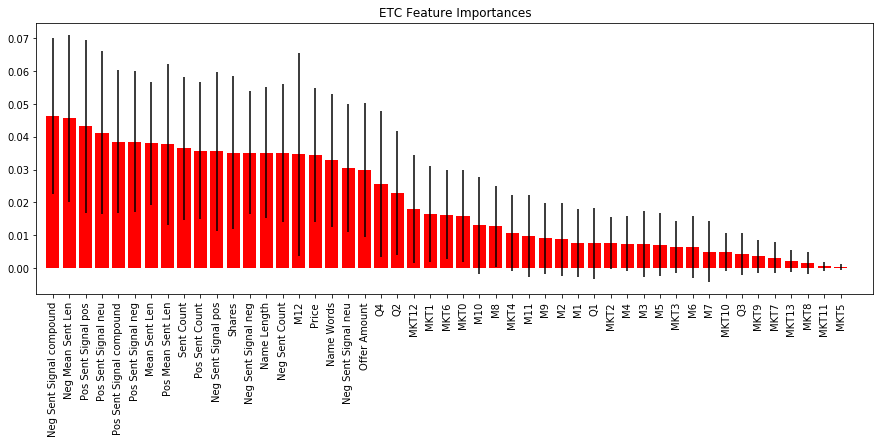

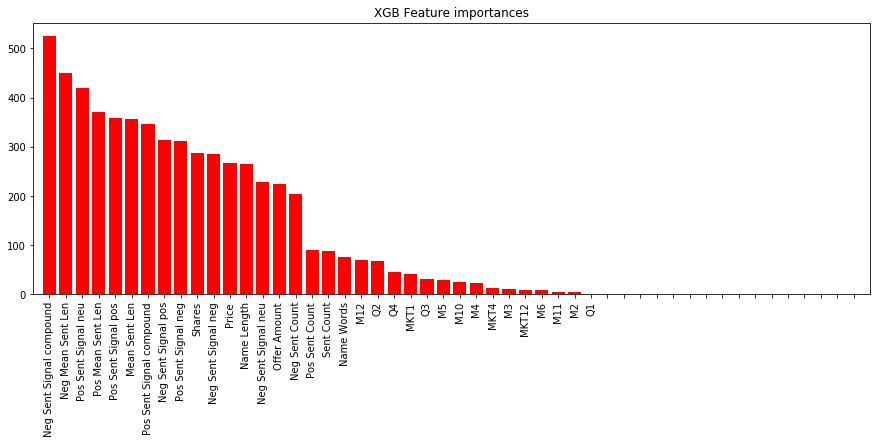

In [26]:
#feature importance
indices = ml.show_feature_importance(df1, '3M')

In [27]:
#feature selection
df1 = ml.select_features(indices.shape[0], indices, df1)

['Neg Mean Sent Len', 'Neg Sent Signal compound', 'Pos Mean Sent Len', 'Pos Sent Signal compound', 'Pos Sent Signal neu', 'Pos Sent Signal pos']


C:\Users\Void\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


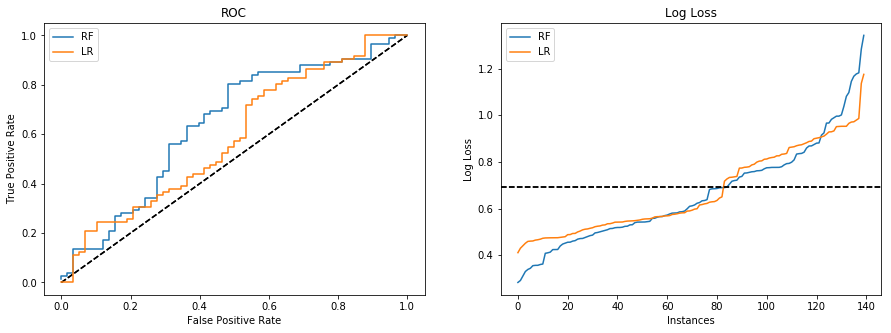

1D        1W        1M        3M
AUC      LR  0.508621  0.508621  0.508621  0.508621
         RF  0.533431  0.533431  0.533431  0.533431
f1       LR  0.742081  0.742081  0.742081  0.742081
         RF  0.741784  0.741784  0.741784  0.741784
log loss LR  0.670812  0.670812  0.670812  0.670812
         RF  0.658956  0.658956  0.658956  0.658956

In [28]:
#now run ML flow with sentiment features
ml.run_ml_flow(df1)